In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Author: Shahzad Mumtaz
# Date: 25 September 2022
# Description: An execution of this script requires a dataset from Kaggle.com (https://www.kaggle.com/datasets/fernandoretamales/health-expenditure-and-suicide-rates)
# In case of using on kaggle.com this will require to be added from the Jupyter Notebook (on the right in under the Add Data Tab)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/health-expenditure-and-suicide-rates/WHO_MHExp_and_Deaths.ipynb
/kaggle/input/health-expenditure-and-suicide-rates/WHO_MHExp_and_Deaths.csv
/kaggle/input/health-expenditure-and-suicide-rates/WHO_MHExp_and_Deaths.sql


In [2]:
# Reading a CSV file  
df_WHO_MHExp_Deaths=pd.read_csv('../input/health-expenditure-and-suicide-rates/WHO_MHExp_and_Deaths.csv')

In [3]:
# Extracting a shape of the dataframe in terms of rows and columns 
df_WHO_MHExp_Deaths.shape

(531, 9)

In [4]:
# Describing meta-data of all the columns in the data frame
df_WHO_MHExp_Deaths.describe(include='all')

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
count,531,531.000000,5.310000e+02,5.310000e+02,531.000000,531.000000,531.000000,531.000000,531.000000
unique,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kyrgyzstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2009.694915,2.535148e+07,4.322763e+05,259.659134,7.555631,5.731205,4.890603,10.832768
std,NaN,5.572266,3.285463e+07,5.856799e+05,1075.051391,2.103642,2.952330,0.605882,5.491425
min,NaN,2000.000000,2.811540e+05,8.360000e+02,0.000000,1.990000,0.390000,2.900000,0.820000
25%,NaN,2005.000000,3.553031e+06,5.733600e+04,0.000000,6.100000,3.860000,4.570000,6.415000
50%,NaN,2010.000000,9.696110e+06,1.841500e+05,2.000000,7.900000,5.080000,5.060000,10.240000
75%,NaN,2014.000000,3.811594e+07,7.411640e+05,42.500000,9.070000,7.640000,5.190000,14.495000


In [5]:
df_WHO_MHExp_Deaths.nunique()

Country_Name          42
Year                  20
Population           528
Deaths_All_Types     530
Deaths_Suicides      157
HExp_Pctage_Y        388
MHExp_Pctage_2011     38
Dep_Num_2015          39
Suicide_p100         467
dtype: int64

In [6]:
df_WHO_MHExp_Deaths.shape[0]-df_WHO_MHExp_Deaths.isnull().count()

Country_Name         0
Year                 0
Population           0
Deaths_All_Types     0
Deaths_Suicides      0
HExp_Pctage_Y        0
MHExp_Pctage_2011    0
Dep_Num_2015         0
Suicide_p100         0
dtype: int64

In [7]:
df_WHO_MHExp_Deaths

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39
...,...,...,...,...,...,...,...,...,...
526,Uzbekistan,2015,31298929.0,304070,2392,4.99,2.32,4.23,9.20
527,Uzbekistan,2016,31847898.0,309582,2467,4.97,2.32,4.23,9.21
528,Uzbekistan,2017,32388561.0,321446,2417,5.08,2.32,4.23,8.92
529,Uzbekistan,2018,32956099.0,309826,2278,5.30,2.32,4.23,8.73


In [8]:
df_YearSummary=df_WHO_MHExp_Deaths.groupby(['Year']).agg({'Population':'mean','Deaths_All_Types':'mean','Deaths_Suicides':'mean','HExp_Pctage_Y':'mean','MHExp_Pctage_2011':'mean','Dep_Num_2015':'mean','Suicide_p100':'sum'})
df_YearSummary


,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Year,,,,,,,
2000,2.160423e+07,375624.727273,165.272727,6.905455,6.606818,4.965000,313.90
2001,2.393607e+07,397838.826087,175.260870,6.861304,6.318261,4.881304,313.38
2002,2.595947e+07,424688.208333,143.833333,7.050833,6.322083,4.890417,316.60
2003,2.591175e+07,450602.625000,143.333333,7.437083,6.363750,4.921667,303.43
2004,2.432219e+07,407523.185185,167.962963,7.396296,6.025926,4.902593,312.12
2005,2.460140e+07,427834.846154,202.576923,7.638462,5.921538,4.882692,300.25
2006,2.393740e+07,412418.680000,164.520000,7.551200,6.008800,4.933200,281.13
2007,2.453670e+07,404107.620690,241.034483,6.945862,5.598276,4.891034,293.46
2008,2.605665e+07,435429.814815,245.407407,7.338519,5.815556,4.897778,294.71


array([[<AxesSubplot:title={'center':'Population'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Deaths_All_Types'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Deaths_Suicides'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'HExp_Pctage_Y'}, xlabel='Year'>],
       [<AxesSubplot:title={'center':'MHExp_Pctage_2011'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Dep_Num_2015'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Suicide_p100'}, xlabel='Year'>,
        <AxesSubplot:xlabel='Year'>]], dtype=object)

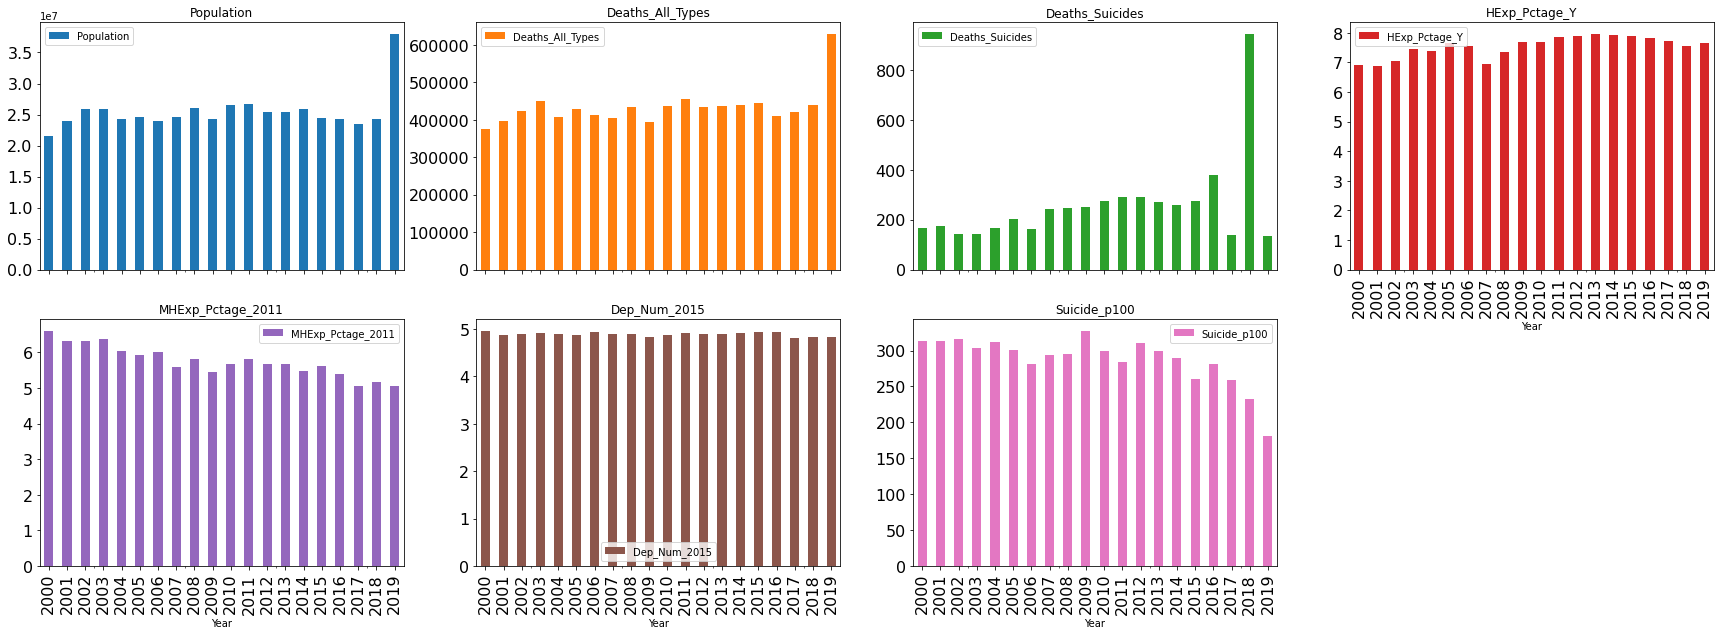

In [9]:
df_YearSummary.plot(subplots=True,layout=(2,4),rot=90,figsize=(30, 10),fontsize=16,kind='bar')

In [10]:
corrMatrix_df_YearSummary=df_YearSummary.corr()
corrMatrix_df_YearSummary.style.background_gradient(cmap='Blues')

,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Population,1.000000,0.964249,-0.142510,0.208346,-0.385974,-0.313693,-0.672320
Deaths_All_Types,0.964249,1.000000,-0.043692,0.320959,-0.452744,-0.306891,-0.796327
Deaths_Suicides,-0.142510,-0.043692,1.000000,0.198816,-0.412033,-0.259291,-0.304203
HExp_Pctage_Y,0.208346,0.320959,0.198816,1.000000,-0.605700,-0.109882,-0.290328
MHExp_Pctage_2011,-0.385974,-0.452744,-0.412033,-0.605700,1.000000,0.630795,0.665595
Dep_Num_2015,-0.313693,-0.306891,-0.259291,-0.109882,0.630795,1.000000,0.382722
Suicide_p100,-0.672320,-0.796327,-0.304203,-0.290328,0.665595,0.382722,1.000000


In [11]:
df_CountrySummary=df_WHO_MHExp_Deaths.groupby(['Country_Name']).agg({'Population':'mean','Deaths_All_Types':'mean','Deaths_Suicides':'mean','HExp_Pctage_Y':'mean','MHExp_Pctage_2011':'mean','Dep_Num_2015':'mean','Suicide_p100':'sum'})
df_CountrySummary

,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Country_Name,,,,,,,
Armenia,3.044001e+06,5.444650e+04,39.333333,8.986667,3.38,4.99,50.87
Australia,2.211075e+07,2.900953e+05,1.842105,8.550526,7.64,5.94,201.58
Azerbaijan,8.281010e+06,1.330716e+05,140.200000,2.576000,2.50,4.64,21.14
Brazil,2.101471e+08,2.699602e+06,3.000000,9.590000,2.38,5.76,6.41
Bulgaria,7.362336e+06,2.191340e+05,478.266667,7.072667,1.40,5.16,117.96
Canada,3.152380e+07,4.480293e+05,1.666667,8.808333,7.20,4.65,63.84
Costa Rica,5.058007e+06,4.858400e+04,0.000000,7.270000,2.91,4.70,7.62
Cyprus,8.122041e+05,1.111438e+04,0.437500,6.226250,4.82,5.06,59.00
Egypt,8.009528e+07,9.822744e+05,74.157895,4.906842,2.29,3.46,68.70


array([[<AxesSubplot:title={'center':'Population'}, xlabel='Country_Name'>],
       [<AxesSubplot:title={'center':'Deaths_All_Types'}, xlabel='Country_Name'>],
       [<AxesSubplot:title={'center':'Deaths_Suicides'}, xlabel='Country_Name'>],
       [<AxesSubplot:title={'center':'HExp_Pctage_Y'}, xlabel='Country_Name'>],
       [<AxesSubplot:title={'center':'MHExp_Pctage_2011'}, xlabel='Country_Name'>],
       [<AxesSubplot:title={'center':'Dep_Num_2015'}, xlabel='Country_Name'>],
       [<AxesSubplot:title={'center':'Suicide_p100'}, xlabel='Country_Name'>]],
      dtype=object)

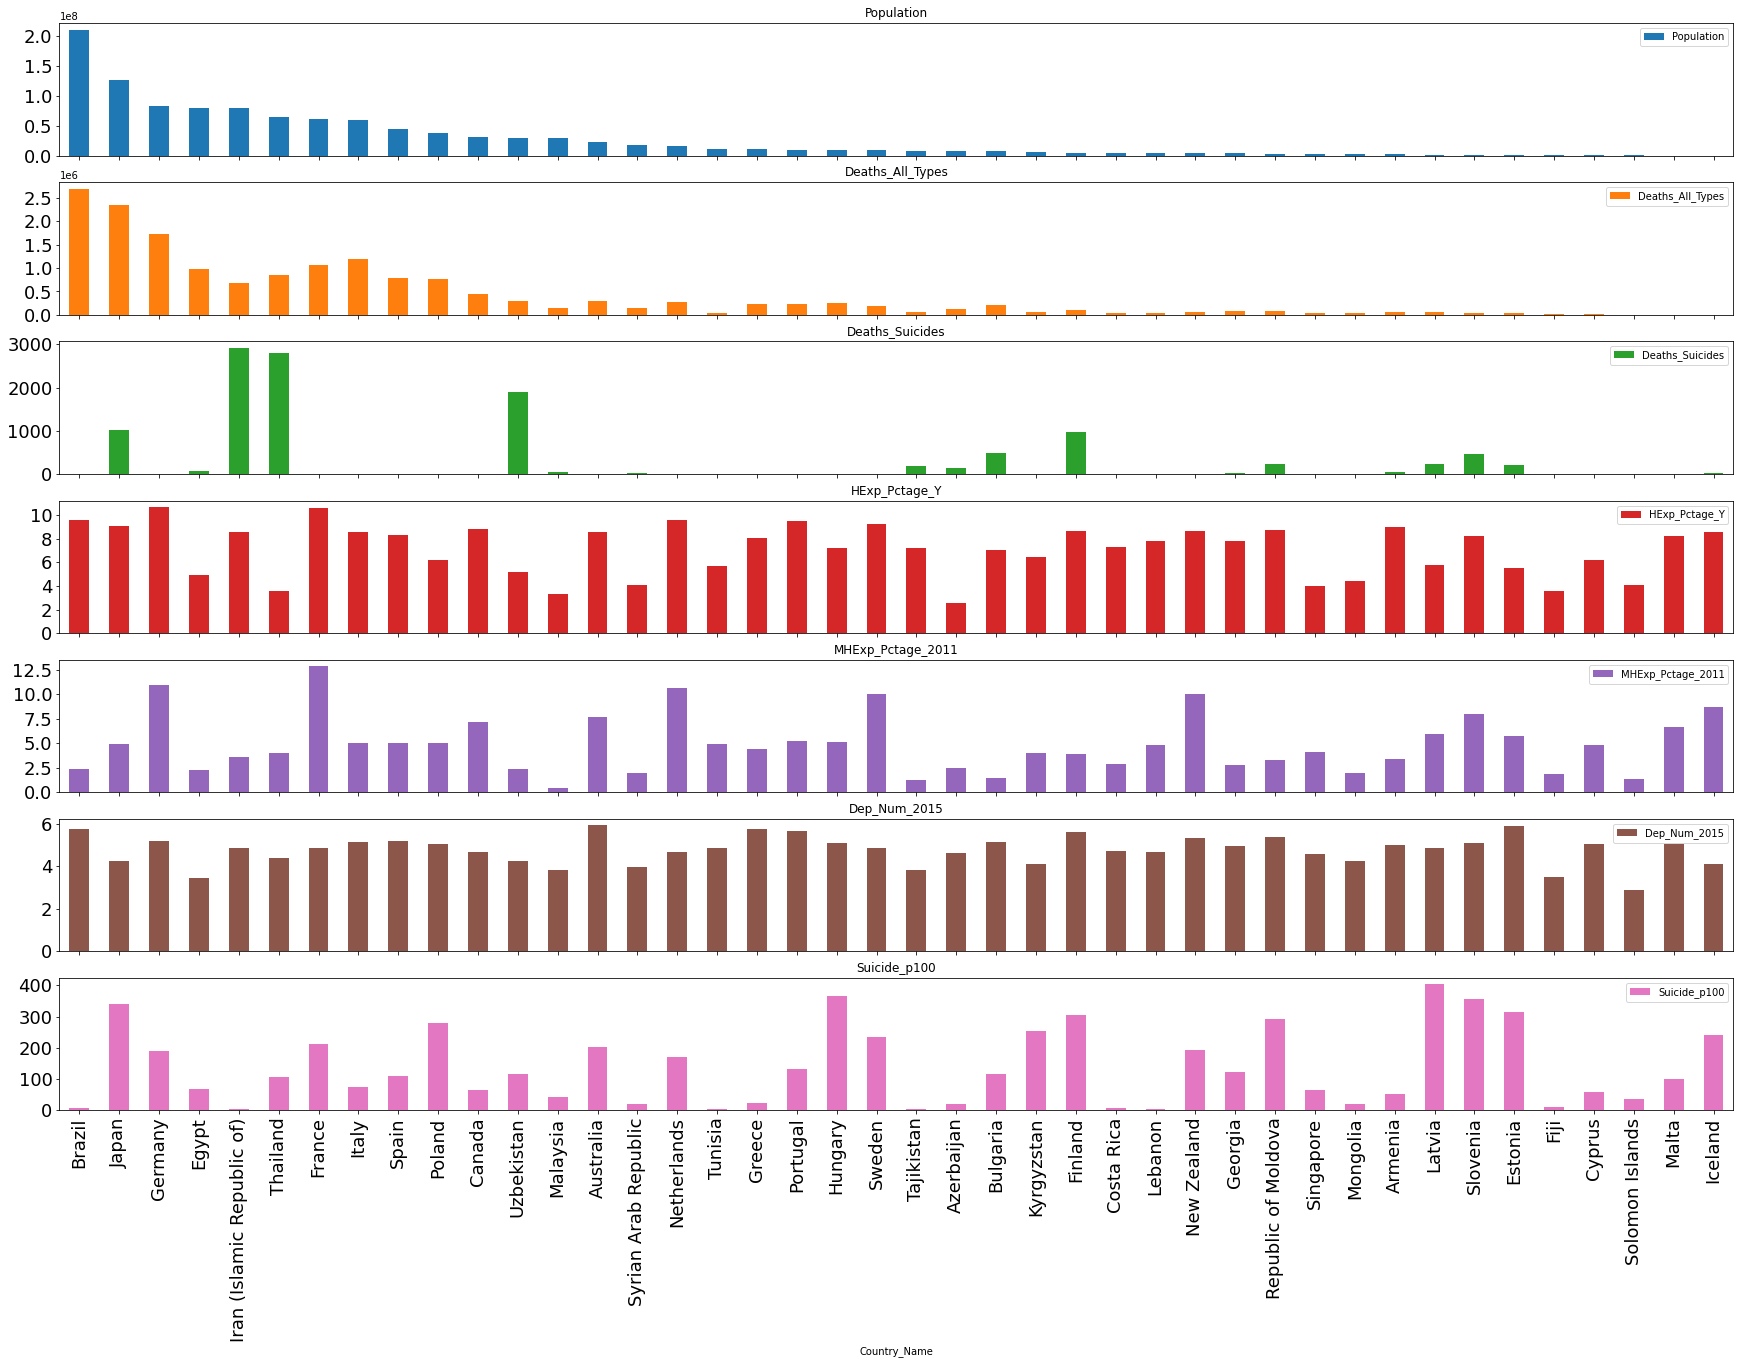

In [12]:
df_CountrySummary.sort_values(by='Population',ascending=False).plot(subplots=True,layout=(7,1),rot=90,figsize=(30, 20),kind='bar',fontsize=18)


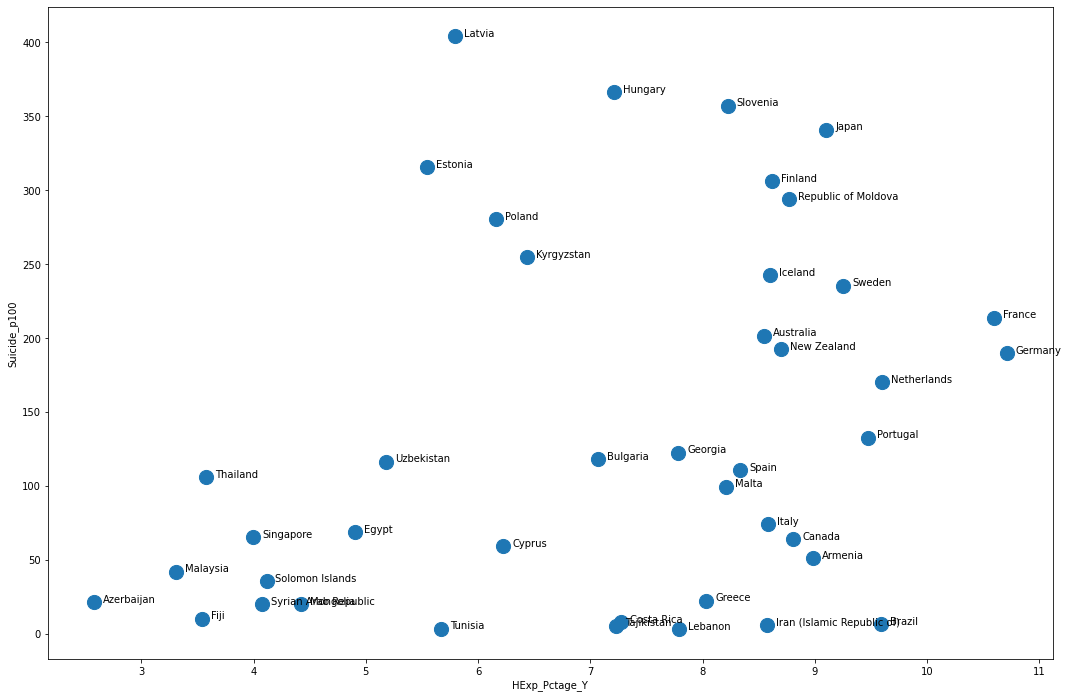

In [13]:
fig, ax = plt.subplots()

df_CountrySummary.plot(kind='scatter', x='HExp_Pctage_Y',y='Suicide_p100',ax=ax,figsize=(18, 12),s=200) 
for index, row in df_CountrySummary.iterrows(): 
    ax.annotate(index, (row['HExp_Pctage_Y']+0.08, row['Suicide_p100'])) 
plt.show()

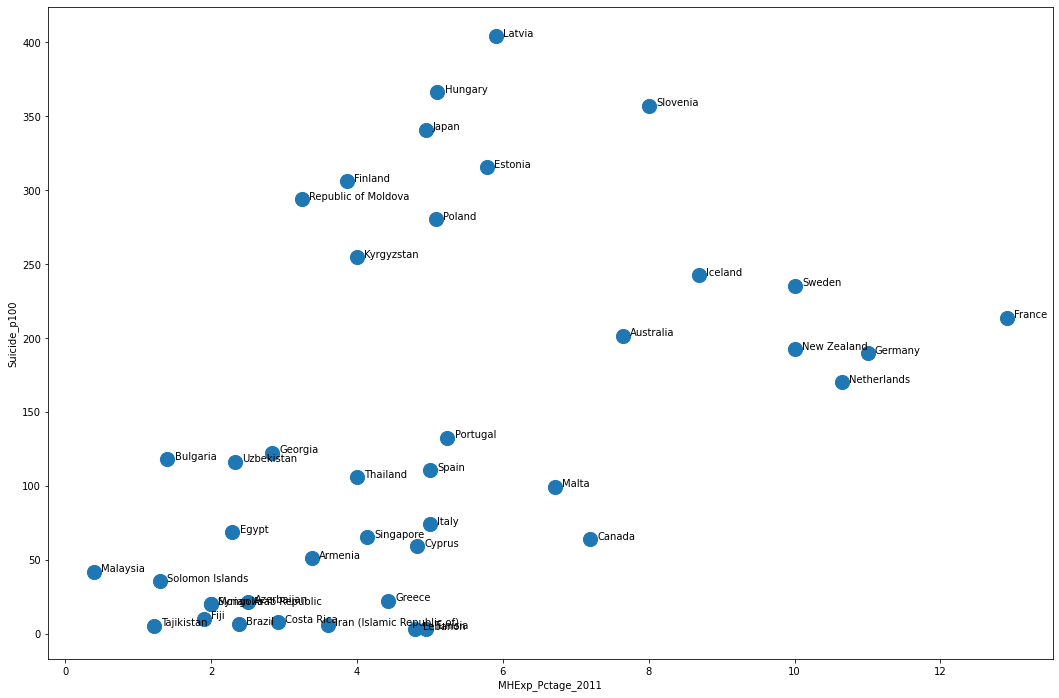

In [14]:
fig, ax = plt.subplots()

df_CountrySummary.plot(kind='scatter', x='MHExp_Pctage_2011',y='Suicide_p100',ax=ax,figsize=(18, 12),s=200) 
for index, row in df_CountrySummary.iterrows(): 
    ax.annotate(index, (row['MHExp_Pctage_2011']+0.1, row['Suicide_p100']))
plt.show()    

In [15]:
corrMatrix_df_CountrySummary=df_CountrySummary.corr()
corrMatrix_df_CountrySummary.style.background_gradient(cmap='Blues')

,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Population,1.000000,0.957074,0.265963,0.272433,0.008152,0.082313,-0.081254
Deaths_All_Types,0.957074,1.000000,0.171728,0.361564,0.127892,0.129297,0.048357
Deaths_Suicides,0.265963,0.171728,1.000000,-0.107335,-0.163927,-0.059620,0.010612
HExp_Pctage_Y,0.272433,0.361564,-0.107335,1.000000,0.631761,0.560018,0.307779
MHExp_Pctage_2011,0.008152,0.127892,-0.163927,0.631761,1.000000,0.375436,0.468213
Dep_Num_2015,0.082313,0.129297,-0.059620,0.560018,0.375436,1.000000,0.313508
Suicide_p100,-0.081254,0.048357,0.010612,0.307779,0.468213,0.313508,1.000000


Variance preserved (first two principal component): [0.36847096 0.27609227]


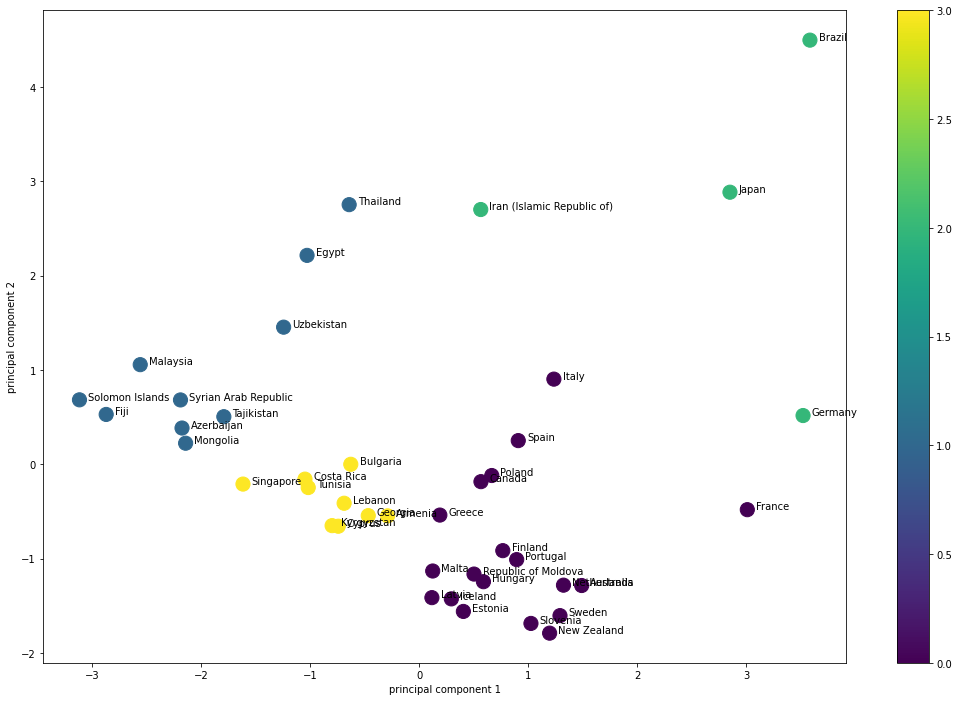

In [16]:
fig, ax = plt.subplots()

df_CountrySummary_standardiseFeatures = StandardScaler().fit_transform(df_CountrySummary)
#kmeans = KMeans(n_clusters=4)
#kmeans.fit(df_CountrySummary_standardiseFeatures)
#y_kmeans = kmeans.predict(df_CountrySummary_standardiseFeatures)

pca = PCA(n_components=2)
pca=pca.fit(df_CountrySummary_standardiseFeatures)
print('Variance preserved (first two principal component):',pca.explained_variance_ratio_)

pca = pca.transform(df_CountrySummary_standardiseFeatures)

df_CountrySummary_pca=pd.DataFrame(data = pca , columns = ['principal component 1', 'principal component 2'])

kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(df_CountrySummary_pca)
y_kmeans_pca = kmeans_pca.predict(df_CountrySummary_pca)

df_CountrySummary_pca.plot(kind='scatter',x=0,y=1,ax=ax,figsize=(18, 12),s=200, c=y_kmeans_pca, cmap='viridis')
df_CountrySummary_pca.index=df_CountrySummary.index

for index, row in df_CountrySummary_pca.iterrows(): 
    ax.annotate(index, (row[0]+0.08, row[1])) 
plt.show()





/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 41 nearest neighbors...
[t-SNE] Indexed 42 samples in 0.000s...
[t-SNE] Computed neighbors for 42 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 42 / 42
[t-SNE] Mean sigma: 2.584427
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.550835
[t-SNE] KL divergence after 1000 iterations: 0.368362


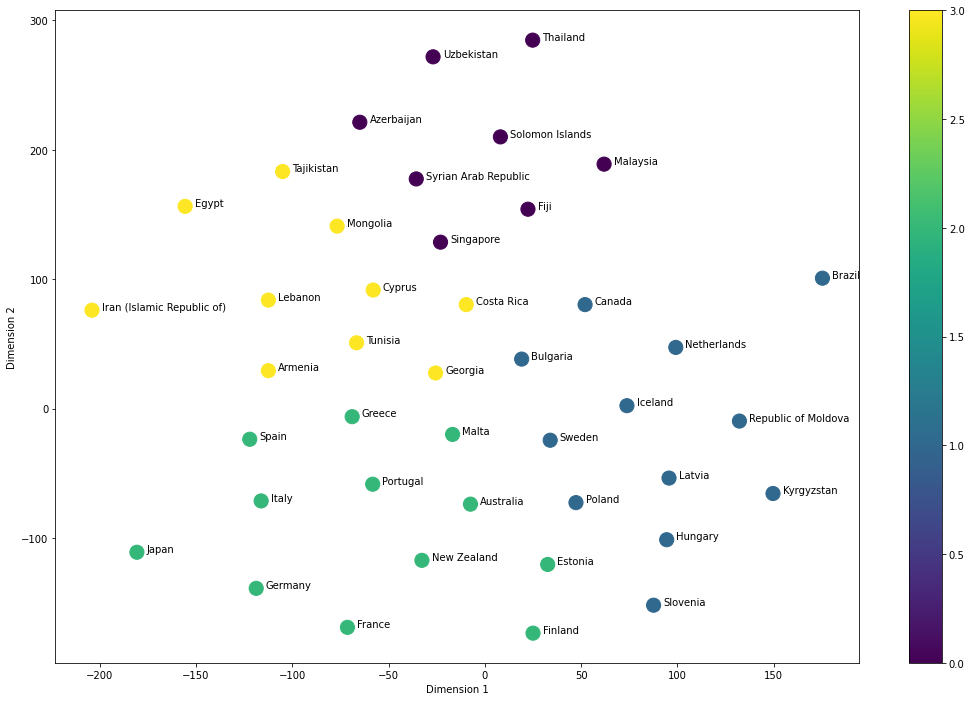

In [17]:
fig, ax = plt.subplots()

tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne = tsne.fit_transform(df_CountrySummary_standardiseFeatures) 

df_CountrySummary_tsne=pd.DataFrame(data = tsne,columns = ['Dimension 1', 'Dimension 2'])

kmeans_tsne = KMeans(n_clusters=4)
kmeans_tsne.fit(df_CountrySummary_tsne)
y_kmeans_tsne = kmeans_tsne.predict(df_CountrySummary_tsne)

df_CountrySummary_tsne.plot(kind='scatter',x=0,y=1,ax=ax,figsize=(18, 12),s=200, c=y_kmeans_tsne, cmap='viridis')
df_CountrySummary_tsne.index=df_CountrySummary.index

for index, row in df_CountrySummary_tsne.iterrows(): 
    ax.annotate(index, (row[0]+5, row[1])) 
plt.show()